# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
files

{'PIPELINE_CONFIG': 'Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow/scripts/generate_tfrecord.py',
 'LABELMAP': 'Tensorflow/workspace/annotations/label_map.pbtxt'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
os.name

'posix'

In [9]:
if os.name=='nt':
    !pip install wget
    import wget

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [11]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

/bin/bash: apt-get: command not found
Processing /Users/AlanZhu/Desktop/OD/TFODCourse/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Using cached opencv_python_headless-4.5.1.48-cp37-cp37m-macosx_10_13_x86_64.whl (40.3 MB)


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1653901 sha256=381eeaa0fcd3dd99e780765b440e4a77a2c78a016533f79101101cc0d57e6e58
  Stored in directory: /private/var/folders/19/gg6zw32s2p14dqb6n0wjj9t80000gn/T/pip-ephem-wheel-cache-26577jm1/wheels/fc/50/ad/ae58df98561ad0bcd11f51ead915c0da8682eb384012fb0520
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [12]:
#Check if all packages are installed
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.1: /Users/AlanZhu/Desktop/OD/TFODCourse/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-13 02:01:16.744296: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/object_detection/builders/model_builder.py:1085: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0613 02:01:17.029080 4616005056 model_builder.py:1085] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.6s
I0613 02:01:17.338151 4616005056 test

I0613 02:01:22.427748 4616005056 efficientnet_model.py:147] round_filter input=16 output=16
I0613 02:01:22.427901 4616005056 efficientnet_model.py:147] round_filter input=24 output=24
I0613 02:01:22.616461 4616005056 efficientnet_model.py:147] round_filter input=24 output=24
I0613 02:01:22.616616 4616005056 efficientnet_model.py:147] round_filter input=40 output=40
I0613 02:01:22.801039 4616005056 efficientnet_model.py:147] round_filter input=40 output=40
I0613 02:01:22.801180 4616005056 efficientnet_model.py:147] round_filter input=80 output=80
I0613 02:01:23.086566 4616005056 efficientnet_model.py:147] round_filter input=80 output=80
I0613 02:01:23.086720 4616005056 efficientnet_model.py:147] round_filter input=112 output=112
I0613 02:01:23.389277 4616005056 efficientnet_model.py:147] round_filter input=112 output=112
I0613 02:01:23.389440 4616005056 efficientnet_model.py:147] round_filter input=192 output=192
I0613 02:01:23.952368 4616005056 efficientnet_model.py:147] round_filter i

I0613 02:01:28.252687 4616005056 efficientnet_model.py:147] round_filter input=192 output=208
I0613 02:01:28.790245 4616005056 efficientnet_model.py:147] round_filter input=192 output=208
I0613 02:01:28.790408 4616005056 efficientnet_model.py:147] round_filter input=320 output=352
I0613 02:01:29.020016 4616005056 efficientnet_model.py:147] round_filter input=1280 output=1408
I0613 02:01:29.079107 4616005056 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size

I0613 02:01:35.550128 4616005056 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b5
I0613 02:01:35.550287 4616005056 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I0613 02:01:35.550378 4616005056 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet BiFPN num iterations: 7
I0613 02:01:35.552749 4616005056 efficientnet_model.py:147] round_filter input=32 output=48
I0613 02:01:35.570749 4616005056 efficientnet_model.py:147] round_filter input=32 output=48
I0613 02:01:35.570895 4616005056 efficientnet_model.py:147] round_filter input=16 output=24
I0613 02:01:35.796465 4616005056 efficientnet_model.py:147] round_filter input=16 output=24
I0613 02:01:35.796602 4616005056 efficientnet_model.py:147] round_filter input=24 output=40
I0613 02:01:36.287152 4616005056 efficientnet_model.py:147] round_filter input=24 output=40
I0613 02:01:36.287349 4616005056 efficientnet_model.py:147] round_fil

I0613 02:01:46.384014 4616005056 efficientnet_model.py:147] round_filter input=24 output=48
I0613 02:01:46.384171 4616005056 efficientnet_model.py:147] round_filter input=40 output=80
I0613 02:01:47.091150 4616005056 efficientnet_model.py:147] round_filter input=40 output=80
I0613 02:01:47.091306 4616005056 efficientnet_model.py:147] round_filter input=80 output=160
I0613 02:01:48.138000 4616005056 efficientnet_model.py:147] round_filter input=80 output=160
I0613 02:01:48.138160 4616005056 efficientnet_model.py:147] round_filter input=112 output=224
I0613 02:01:49.191196 4616005056 efficientnet_model.py:147] round_filter input=112 output=224
I0613 02:01:49.191339 4616005056 efficientnet_model.py:147] round_filter input=192 output=384
I0613 02:01:50.877703 4616005056 efficientnet_model.py:147] round_filter input=192 output=384
I0613 02:01:50.877863 4616005056 efficientnet_model.py:147] round_filter input=320 output=640
I0613 02:01:51.793957 4616005056 efficientnet_model.py:147] round_fi

In [13]:
!pip install tensorflow --upgrade
#!pip install tensorflow-gpu --upgrade #For trainning on GPU

In [14]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-3.17.3-cp37-cp37m-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached matplotlib-3.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (12.4 MB)


In [15]:
import object_detection

In [16]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.30.0
appdirs                       1.4.4
appnope                       0.1.2
astunparse                    1.6.3
attrs                         21.2.0
avro-python3                  1.9.1
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.2
certifi                       2021.5.30
cffi                          1.14.5
chardet                       4.0.0
contextlib2                   0.6.0.post1
crcmod                        1.7
cycler                        0.10.0
Cython                        0.29.23
decorator                     5.0.9
dill                          0.3.1.1
distlib                       0.3.2
dm-tree                       0.1.6
docopt                        0.6.2
fastavro     

In [17]:
!pip install wget
import wget

In [18]:
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
#Tensorflow OD model zoo

In [19]:

if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

/bin/bash: wget: command not found
mv: ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz: No such file or directory
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [20]:
labels = [{'name':'thumbsup', 'id':1}, {'name':'thumbsdown', 'id':2}, {'name':'heart', 'id':3}, {'name':'livelong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [21]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [22]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [23]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Traceback (most recent call last):
  File "Tensorflow/scripts/generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "Tensorflow/scripts/generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "Tensorflow/scripts/generate_tfrecord.py", line 112, in create_tf_example
    encoded_jpg = fid.read()
  File "/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/tensorfl

# 4. Copy Model Config to Training Folder

In [24]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [25]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [26]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [27]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [28]:
#Set all the size,file path and other configs
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [29]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [30]:
pipeline_config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

# 6. Train the model

In [31]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [32]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [33]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --num_train_steps=2500


In [34]:
!{command}

2021-06-13 02:02:19.952276: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0613 02:02:19.954020 4711265728 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
W0613 02:02:19.954446 4711265728 mirrored_strategy.py:379] Collective ops is not configured at program startup. Some performance features may not be enabled.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0613 02:02:19.958795 4711265728 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2500
I0613 02:02:19.967461 4711265728 config_util.py:552] Maybe ov

INFO:tensorflow:Step 200 per-step time 1.898s
I0613 02:10:17.449383 4711265728 model_lib_v2.py:700] Step 200 per-step time 1.898s
INFO:tensorflow:{'Loss/classification_loss': 0.19848153,
 'Loss/localization_loss': 0.21989653,
 'Loss/regularization_loss': 0.15443517,
 'Loss/total_loss': 0.5728133,
 'learning_rate': 0.0373328}
I0613 02:10:17.449630 4711265728 model_lib_v2.py:701] {'Loss/classification_loss': 0.19848153,
 'Loss/localization_loss': 0.21989653,
 'Loss/regularization_loss': 0.15443517,
 'Loss/total_loss': 0.5728133,
 'learning_rate': 0.0373328}
INFO:tensorflow:Step 300 per-step time 1.910s
I0613 02:13:28.477556 4711265728 model_lib_v2.py:700] Step 300 per-step time 1.910s
INFO:tensorflow:{'Loss/classification_loss': 0.13709477,
 'Loss/localization_loss': 0.12537172,
 'Loss/regularization_loss': 0.1543587,
 'Loss/total_loss': 0.4168252,
 'learning_rate': 0.0426662}
I0613 02:13:28.477893 4711265728 model_lib_v2.py:701] {'Loss/classification_loss': 0.13709477,
 'Loss/localizati

INFO:tensorflow:Step 1700 per-step time 1.864s
I0613 02:57:36.035162 4711265728 model_lib_v2.py:700] Step 1700 per-step time 1.864s
INFO:tensorflow:{'Loss/classification_loss': 0.12653916,
 'Loss/localization_loss': 0.031696368,
 'Loss/regularization_loss': 0.14804712,
 'Loss/total_loss': 0.30628264,
 'learning_rate': 0.07995972}
I0613 02:57:36.035407 4711265728 model_lib_v2.py:701] {'Loss/classification_loss': 0.12653916,
 'Loss/localization_loss': 0.031696368,
 'Loss/regularization_loss': 0.14804712,
 'Loss/total_loss': 0.30628264,
 'learning_rate': 0.07995972}
INFO:tensorflow:Step 1800 per-step time 1.852s
I0613 03:00:41.267797 4711265728 model_lib_v2.py:700] Step 1800 per-step time 1.852s
INFO:tensorflow:{'Loss/classification_loss': 0.10287357,
 'Loss/localization_loss': 0.0400195,
 'Loss/regularization_loss': 0.14731534,
 'Loss/total_loss': 0.2902084,
 'learning_rate': 0.0799474}
I0613 03:00:41.268087 4711265728 model_lib_v2.py:701] {'Loss/classification_loss': 0.10287357,
 'Loss/

In [35]:
#trainning 

In [36]:
#trainning

# 7. Evaluate the Model

In [37]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [38]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned


In [39]:
!{command}

W0613 03:22:22.174860 4512802240 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0613 03:22:22.175077 4512802240 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0613 03:22:22.175152 4512802240 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0613 03:22:22.175251 4512802240 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0613 03:22:22.175397 4512802240 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-06-13 03:22:22.180050: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical 

INFO:tensorflow:Performing evaluation on 10 images.
I0613 03:23:02.386351 4512802240 coco_evaluation.py:293] Performing evaluation on 10 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0613 03:23:02.386660 4512802240 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0613 03:23:02.387340 4512802240 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.647
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.680
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 A

# 8. Load Train Model From Checkpoint

In [42]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [44]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [45]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [47]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.380310aa-cb7e-11eb-b3cd-f45c89c16c1b.jpg')

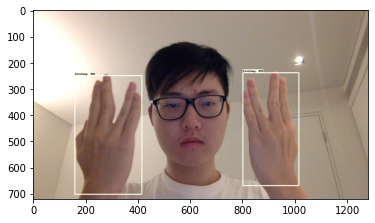

In [48]:
#Run object detection on the selected image

#Load image
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

#Convert to tensor
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
#Call detection function
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [49]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [50]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [51]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [52]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --output_directory=Tensorflow/workspace/models/my_ssd_mobnet_tuned/export


In [53]:
!{command}

2021-06-13 03:32:38.809696: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0613 03:32:39.042680 4613125568 deprecation.py:601] From /Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results 

2021-06-13 03:33:19.217528: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0613 03:33:40.908350 4613125568 save.py:243] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)

FOR DEVS: If you ar

# 11. Conversion to TFJS

In [54]:
!pip install tensorflowjs

In [55]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [56]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet_tuned/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet_tuned/tfjsexport


In [57]:
!{command}

2021-06-13 03:33:56.471474: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-06-13 03:34:07.787300: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-06-13 03:34:07.787405: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-06-13 03:34:08.169264: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3991 nodes (3582), 8430 edges (8014), time = 243.776ms.
  function_optimizer: function_optimizer did nothing. time = 7.182ms.

2021-06-13 03:34:13.473802: I t

In [58]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [59]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [60]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [61]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --output_directory=Tensorflow/workspace/models/my_ssd_mobnet_tuned/tfliteexport


In [62]:
!{command}

2021-06-13 03:34:30.864172: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0613 03:34:41.563776 4611028416 save_impl.py:77] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x1547b51d0>, because it is not built.
W0613 03:34:41.733811 4611028416 save_impl.py:77] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x155d3a2e8>, because it is not built.
W0613 03:34:41.733998 4611028416 save_impl.py:77] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x155f76828>, because it is not built.
W0613 03:34:41.734233 4611028416 save_impl.p

2021-06-13 03:34:52.065443: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0613 03:35:11.642822 4611028416 save.py:243] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
/Users/AlanZhu/Desktop/OD/TFODCourse/tfod/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)

FOR DEVS: If you ar

In [63]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [64]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [65]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet_tuned/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [66]:
!{command}

2021-06-13 03:35:23.188936: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-06-13 03:35:36.106592: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-06-13 03:35:36.106619: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-06-13 03:35:36.106626: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored change_concat_input_ranges.
2021-06-13 03:35:36.107694: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: Tensorflow/workspace/models/my_ssd_mobnet_tuned/tfliteexport/saved_model
2021-06-13 03:35:36.240144: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with t

# 13. Zip and Export Models 

In [67]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [68]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'